In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
variable = data.columns.tolist()

In [6]:
missing = []
for i in variable:
    if data[i].isnull().sum() != 0:
        missing.append(data[i])
if len(missing) == 0:
    print('There\'s no missing value in the data set.')
else: 
    print('There\'s missing value in the data set. Please check further.')

There's no missing value in the data set.


## Logistic Regression Model

In [10]:
# list(variable)
categories = ['BusinessTravel','Department','Education','EducationField','Gender','MaritalStatus','OverTime', #'NumCompaniesWorked',
              'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','NumCompaniesWorked',
              'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
categorical = data[categories].astype('object')
categorical = pd.get_dummies(data[categories], drop_first = True)

In [11]:
no_use = ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']
continuous = data.drop(columns= categories)
continuous = continuous.drop(columns= no_use)
X = pd.concat([categorical,continuous],axis=1)
Y = data['Attrition'].replace({'Yes': 1, 'No': 0}).values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
continuous_variables = list(continuous.columns)

x_train = x_train.reset_index()
del x_train['index']
x_train[continuous_variables] = pd.DataFrame(scaler.fit_transform(x_train[continuous_variables]), columns = continuous_variables)
x_test = x_test.reset_index()
del x_test['index']
x_test[continuous_variables] = pd.DataFrame(scaler.transform(x_test[continuous_variables]))

In [14]:
from sklearn.linear_model import LogisticRegressionCV
import warnings 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    clf = LogisticRegressionCV(cv=5, random_state=0).fit(x_train, y_train)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_result = clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_result))
print("Precision: ", precision_score(y_test, y_result))
print("Recall: ", recall_score(y_test, y_result))

Accuracy:  0.9047619047619048
Precision:  0.7142857142857143
Recall:  0.5


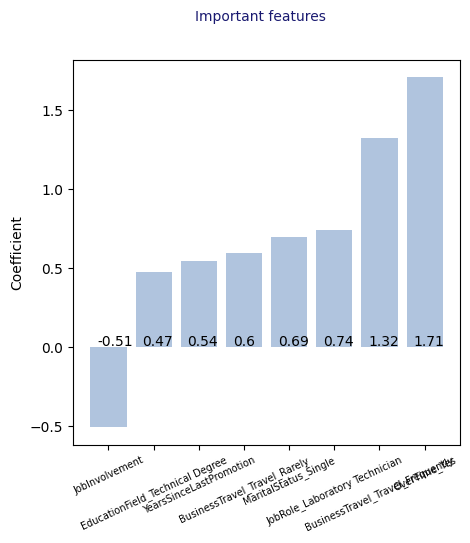

In [25]:
import matplotlib.pyplot as plt
import numpy as np

cdf = pd.DataFrame(np.transpose(clf.coef_), x_test.columns.values, columns=['Coefficients'])
cdf = cdf.sort_values(by='Coefficients', ascending=True)
important = cdf[cdf['Coefficients'].abs() >= 0.45]   # Features with coefficients higher than 0.45 or lower than -0.45

plt.figure(figsize=(5,5))
plt.bar(important.index, important['Coefficients'],color='lightsteelblue')
plt.xticks(rotation=25, fontsize=7)

for i in range(0,len(important.index)): 
    plt.text(i-.25 ,.01, round(important['Coefficients'][i],2),fontsize = 10)

plt.ylabel('Coefficient', fontsize=10)
plt.suptitle('Important features',fontsize=10, color='midnightblue')
plt.show()

C:\Users\Lidor\AppData\Local\Temp\ipykernel_5040\1647579868.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y--" (-> color='y'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')


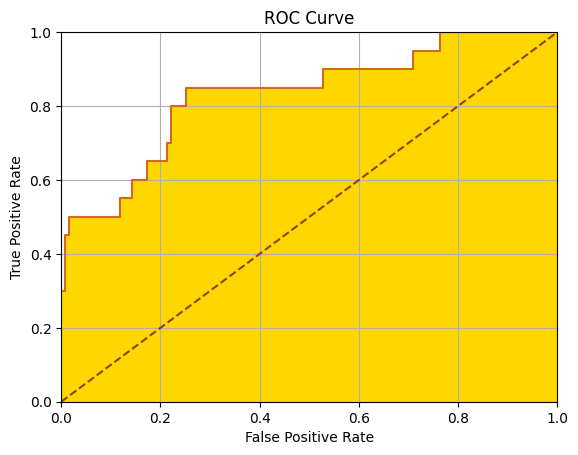

AUC: 0.87


In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1], pos_label =1)
plt.title('ROC Curve')
plt.plot(fpr, tpr, color='chocolate') 
plt.fill_between(fpr, tpr, color='gold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0, 1], [0, 1], 'y--',color='saddlebrown')
plt.grid(True)
plt.show()

from sklearn.metrics import roc_auc_score
print('AUC:', '{:.2f}'.format(roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])))